In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
image_path = ("G:\My Drive\Riyadh-Data-set\RUH-B4-B8_2018-12-15.tif")

In [3]:
data = gdal.Open(image_path)

c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [4]:
band = data.GetRasterBand(1)
ndvi = band.ReadAsArray()

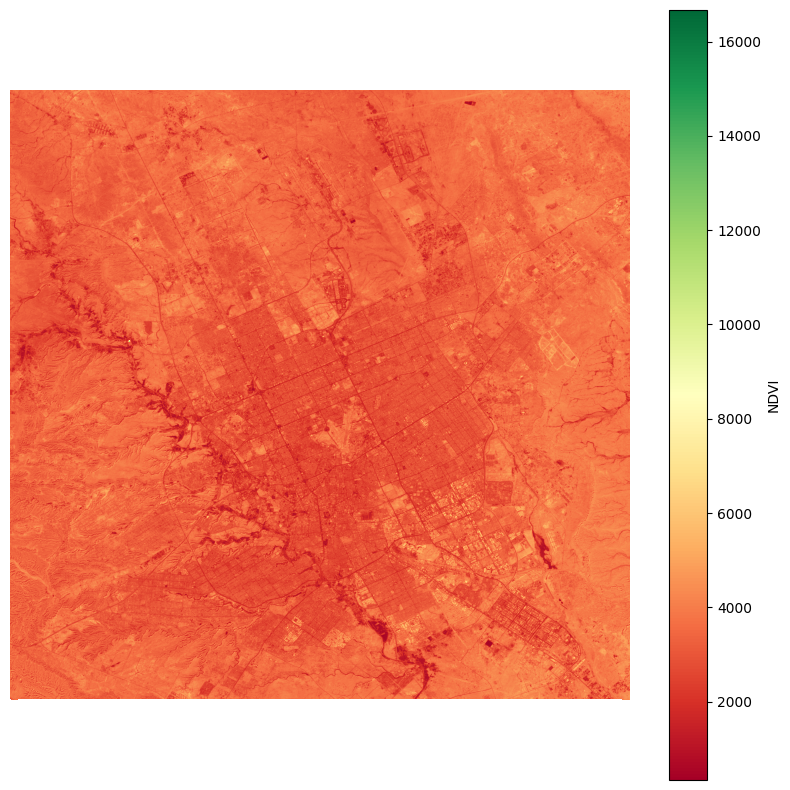

In [5]:
plt.figure(figsize=(10, 10))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.axis('off')  # Turn off the axis
plt.show()

In [6]:
# Count NaN values in the array
nan_count = np.count_nonzero(np.isnan(ndvi))

# Count zero values in the array
zero_count = np.count_nonzero(ndvi == 0)

print(f"Number of NaN values in the data: {nan_count}")
print(f"Number of zero values in the data: {zero_count}")


Number of NaN values in the data: 22013
Number of zero values in the data: 0


In [2]:

import os

# Specify the path to the folder containing the imagery files
folder_path = ("G:\My Drive\Riyadh-Data-set\RUH_Row")  # Replace this with the path to your folder

# List all .tif files in the folder
tif_files = [f for f in os.listdir(folder_path) if f.endswith('.tif')]

# Check if the list of files matches the expected number
if len(tif_files) != 60:
    print("Warning: The number of .tif files in the folder is not 60.")
    
for file_name in tif_files:
    # Construct the full file path
    file_path = os.path.join(folder_path, file_name)
    
    # Open the file
    data = gdal.Open(file_path)
    
    # Loop through the first two bands
    for band_num in range(1, 3):
        band = data.GetRasterBand(band_num)
        array = band.ReadAsArray()
        
        # Count NaN values in the band
        nan_count = np.count_nonzero(np.isnan(array))
        
        # Count zero values in the band
        zero_count = np.count_nonzero(array == 0)
        
        print(f"File: {file_name}, Band: {band_num}, NaN values: {nan_count}, Zero values: {zero_count}")


c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


File: RUH-B4-B8_2018-12-15.tif, Band: 1, NaN values: 22013, Zero values: 0
File: RUH-B4-B8_2018-12-15.tif, Band: 2, NaN values: 22013, Zero values: 0
File: RUH-B4-B8_2019-02-13.tif, Band: 1, NaN values: 22013, Zero values: 0
File: RUH-B4-B8_2019-02-13.tif, Band: 2, NaN values: 22013, Zero values: 0
File: RUH-B4-B8_2019-01-14.tif, Band: 1, NaN values: 22013, Zero values: 0
File: RUH-B4-B8_2019-01-14.tif, Band: 2, NaN values: 22013, Zero values: 0
File: RUH-B4-B8_2019-03-15.tif, Band: 1, NaN values: 22013, Zero values: 0
File: RUH-B4-B8_2019-03-15.tif, Band: 2, NaN values: 22013, Zero values: 0
File: RUH-B4-B8_2019-04-14.tif, Band: 1, NaN values: 22013, Zero values: 0
File: RUH-B4-B8_2019-04-14.tif, Band: 2, NaN values: 22013, Zero values: 0
File: RUH-B4-B8_2019-05-14.tif, Band: 1, NaN values: 22013, Zero values: 0
File: RUH-B4-B8_2019-05-14.tif, Band: 2, NaN values: 22013, Zero values: 0
File: RUH-B4-B8_2019-06-13.tif, Band: 1, NaN values: 22013, Zero values: 0
File: RUH-B4-B8_2019-06-1

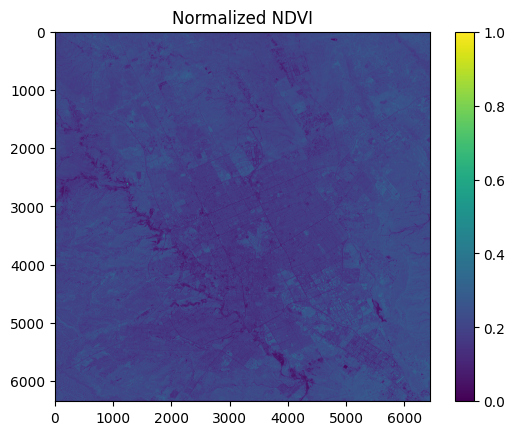

In [6]:
# Path to your TIFF file
image_path = ("G:\My Drive\Riyadh-Data-set\RUH_Row\RUH-B4-B8_2018-12-15.tif")

# Open the image
data = gdal.Open(image_path)

# Check if the data object is not None
if data is None:
    print("Unable to open the image file.")
else:
    # Get the raster band (assuming you want the first band)
    band = data.GetRasterBand(1)

    # Read the band as an array
    ndvi = band.ReadAsArray()

    # Replace NaN values with a very small number
    ndvi_processed = np.nan_to_num(ndvi, nan=0.01)

    # Normalize the processed NDVI data to the [0, 1] range
    ndvi_min = ndvi_processed.min()
    ndvi_max = ndvi_processed.max()
    ndvi_normalized = (ndvi_processed - ndvi_min) / (ndvi_max - ndvi_min)

    # Plotting the normalized NDVI data
    plt.imshow(ndvi_normalized, cmap='viridis')
    plt.colorbar()
    plt.title('Normalized NDVI')
    plt.show()